### Working with Strings

JingWen Fu\
jf3483@columbia.edu

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### a) Length of Narratives
Read in the data. Find and display the longest and shortest description.

In [2]:
em = pd.read_csv("./emergency.csv", names=['description'])
em.head()

,description
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [3]:
em.head

<bound method NDFrame.head of                                             description
0     10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1              75YOF WITH LAC TO FINGER FROM METAL CAN 
2              8YOF FRACTURED FINGER FELL OFF HER BIKE 
3     9 YOM TACKLED DURING FOOTBALL PRACTICE.  DX: C...
4     PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...
...                                                 ...
9995  RT HIP STRAIN.9YOM WAS PLAYING FOOTBALL AND IN...
9996  16 MO MALE FELL AND HIT HEAD ON A TRAIN TABLE....
9997      RAN INTO TABLE, HIT FACE DX: FACIAL CONTUSION
9998       81YOF-HUMERUS FX-FELL DOWN 3-4 STEPS-@ HOME 
9999  30YOM PUSHING TRASH DOWN INTO A GARBAGE CAN WI...

[10000 rows x 1 columns]>

In [4]:
em["len"] = em["description"].map(lambda x: len(x))

In [5]:
em.sort_values(by=["len"], ascending=False)

,description,len
5811,DX SYNCOPE/PROLONGED QT/CHEST PN: 49YOF COMPET...,143
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143
4322,"AT HOUSE- FELL ONTO BACK OF HIS HEAD, WHILE ...",143
6493,"21MOF IN LIVING ROOM,FOUND W/BURN THUMB,OTTOMA...",143
4791,"79 YO F, C/O RT SHOULDER, FACIAL PAIN, WAS WAL...",143
...,...,...
5342,H'TMA HEAD ON SINK,19
4357,FX TIBIA- FELL BED,19
5365,FAN FALL ON PT. HI,19
7731,INGESTION OF ***,17


In [6]:
# the longest descriptions
em[em.sort_values(by=["len"], ascending=False)["len"] == 143]

/var/folders/y6/fc2l4qks2738lxj3679w4wkm0000gn/T/ipykernel_94184/1305557127.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  em[em.sort_values(by=["len"], ascending=False)["len"] == 143]


,description,len
109,40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...,143
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143
630,44YOF PT HAVING SEVERE R ARM PAIN THAT IS RAD...,143
920,57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...,143
1111,"13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...",143
...,...,...
9370,"20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...",143
9666,22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...,143
9670,45YOWM TONIGHT PT WAS TRYING TO MOVE HIS FATH...,143
9749,"PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...",143


In [7]:
# the shortest descriptions
em[em.sort_values(by=["len"], ascending=True)["len"] == 17]

/var/folders/y6/fc2l4qks2738lxj3679w4wkm0000gn/T/ipykernel_94184/2713333249.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  em[em.sort_values(by=["len"], ascending=True)["len"] == 17]


,description,len
7127,ABR HIP ON FLOOR,17
7731,INGESTION OF ***,17


In [8]:
# em.sort_values(by=["len"], ascending=False).iloc[0][0]  # shows the description in the first row ([0,0] means coordinate)
# em.sort_values(by=["len"], ascending=False).iloc[0][1]  # shows the len in the first row ([0, 1] means coordinate)

#### method2

In [9]:
#longest description
lengths = em['description'].str.len()
argmax = np.where(lengths == lengths.max())[0]
em.iloc[argmax]

,description,len
109,40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...,143
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143
630,44YOF PT HAVING SEVERE R ARM PAIN THAT IS RAD...,143
920,57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...,143
1111,"13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...",143
...,...,...
9370,"20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...",143
9666,22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...,143
9670,45YOWM TONIGHT PT WAS TRYING TO MOVE HIS FATH...,143
9749,"PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...",143


In [10]:
#shortest description
argmin = np.where(lengths == lengths.min())[0]
em.iloc[argmin]

,description,len
7127,ABR HIP ON FLOOR,17
7731,INGESTION OF ***,17


#### b) Fractures
Find all narratives related to "fractures". Try to include singular/plural/verb forms in your search. Also, `FX` is the medical abbreviation for fracture, so include that as well. How many fracture narratives can you find?

In [11]:
b_fra = [d for d in em.description if re.search(r'(FRACT|FX|FR\sACT)', d)]

In [12]:
len([d for d in em.description if re.search(r'(FRACT|FX|FR\sACT)', d)])

1510

In [13]:
fracture_df = em[(em['description'].str.contains('FRACTUR'))| (em['description'].str.contains('FX'))]
fracture_df.shape[0]

1499

###### c) Body Parts
Among the fracture narratives, try to identify the body parts that are fractured (Note: Don't go overboard. A selection of parts is sufficient.). Make a histogram of fractured body parts (but make sure plural and singular forms are combined.)

In [14]:
len([d for d in b_fra if re.search(r'(ANKLE)', d)])

128

In [15]:
len([d for d in b_fra if re.search(r'(SKULL)', d)])

21

In [16]:
len([d for d in b_fra if re.search(r'(FINGER)', d)])

143

In [17]:
len([d for d in b_fra if re.search(r'(WRIST)', d)])

146

In [18]:
len([d for d in b_fra if re.search(r'(FEMUR)', d)])

25

array([[<AxesSubplot:title={'center':'len_'}>]], dtype=object)

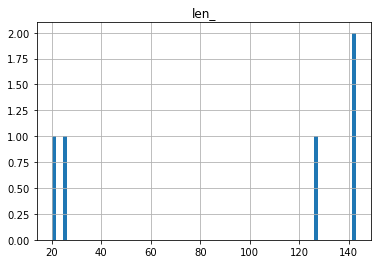

In [19]:
x = {'body parts': ['ANKLE', 'SKULL', 'FINGER', 'WRIST', 'FEMUR'], 'len_': [127,20,142,143,25]}
body_parts = pd.DataFrame(x)
body_parts.hist(bins = 80)

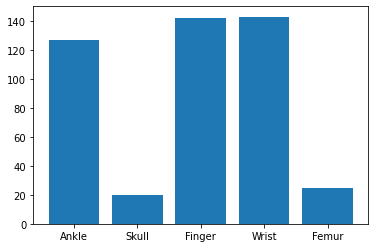

In [20]:
x1 = np.arange(5)
plt.bar(x1, height=[127,20,142,143,25])
plt.xticks(x1, ['Ankle','Skull','Finger','Wrist','Femur']);

In [21]:
# sns.histplot(data=mpg, x="mpg", hue="cylinders")

In [22]:
dic = {}
body_dic = {}
lst = []
#Get the words before and after fracture
for i in fracture_df['description']:
    lst.append(re.search(r'(?:\S+\s)?\S*(FRACTUR|FX)\S*(?:\s\S+)?', i).group())
for i in lst:
    for j in i.split():
        if (j or j[:-1] or j[:-2]) in dic.keys():
            dic[j] += 1
        else:
            dic[j] = 1
#Pick the body parts that appears more than 10 times
for i in dic.keys():
    if (i != 'FRACTURED') and (i != 'FRACTURE') and (i != 'FX') and (i != 'FRACTURING') and (i != 'FXS'):
        if dic.get(i) > 10:
            body_dic[i] = dic.get(i)

In [23]:
#Drop the keys that are not body parts
print(body_dic.keys())
del body_dic['DX:']
del body_dic['DX']
del body_dic['DISTAL']
del body_dic['FX.']
del body_dic['FELL']
del body_dic['COMPRESSION']
del body_dic['CLOSED']
del body_dic['OF']
del body_dic['R']
del body_dic['WITH']
del body_dic['TO']
del body_dic['FX,']
del body_dic['AND']
del body_dic['L']
del body_dic['YOM']
del body_dic['RT']
del body_dic['FRACTURE.']
del body_dic['>>FX']
del body_dic['DX.']
del body_dic['LT']
del body_dic['A']
del body_dic['LOWER']
del body_dic['RIGHT']
del body_dic['FLOOR']
del body_dic['LEFT']

dict_keys(['SKULL', 'FINGER', 'DX:', 'RADIUS', 'ANKLE', 'DX', 'DISTAL', 'FX.', 'FIBULA', 'FELL', 'FOREARM', 'COMPRESSION', 'CLOSED', 'OF', 'ELBOW', 'R', 'BONE', 'WITH', 'TO', 'SHOULDER', 'FX,', 'HIP', 'CLAVICLE', 'RIB', 'FEMUR', 'AND', 'L', 'ARM', 'WRIST', 'YOM', 'TIBIA', 'HUMERUS', 'TOE', 'RT', 'FOOT', 'ULNA', 'FRACTURE.', '>>FX', 'DX.', 'LT', 'A', 'HAND', 'LOWER', 'RIGHT', 'FLOOR', 'LEFT', 'LEG', 'NASAL', 'THUMB'])


Text(0.5, 0, 'Body Parts')

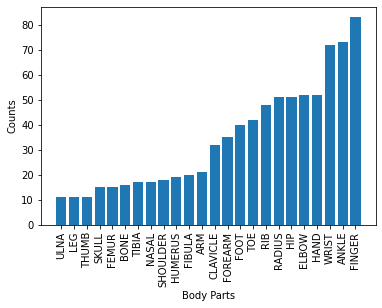

In [24]:
sorted_body_dic = dict(sorted(body_dic.items(), key=lambda item: item[1]))
plt.bar(sorted_body_dic.keys(), sorted_body_dic.values())
plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('Body Parts')

In [25]:
fracture_df[fracture_df['description'].str.contains('LEG')]

,description,len
258,38 YO F STRUCK LEG AGAINST MAILBOX FX TIBIA,43
504,PT SLIPPED OFF PORCH AND LANDED ON LT LEG DX: ...,54
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143
581,8 MONTH M FX HIS LOWER LEG WHEN HE FELL OUT OF...,51
589,12 YR M FELL WHEN ROLLERSKATING;DX FRACTURED L...,55
...,...,...
9338,19YOF FELL TWISTED LEG PLAYING SOCCER DX: LOWE...,61
9660,6 YO M FX UPPER LEG WHEN FLOORING MATERIAL FEL...,55
9805,3YOF LEG PAIN AFTER JUMPING ON A TRAMPOLINE WI...,90
9877,51YOM FRACTURED RADIUS ABRASION TO LEG FELL OF...,70


#### d) Age and Gender
Let's try to extract age and gender. In a number of narratives you may have noticed a pattern:
  * "**75 YOM**, FELL DOWN STAIRS, FRACTURE LEG": A 75 year old male.
  * "**21MOF** FINGER SHUT IN WINDOW AT HOME;NAILBED INJURY: A 21 month-old female child.
  * "DX:AVULSION OF SKIN-**50YOF**-CUT THUMB WITH SCISSORS TONIGHT-OPENING A BOX": A 50 year old female.
  * "LEFT ELBOW CONTUSION,RT SHIN LAC.PT WAS ICE SKATING AND FELL.": No information about age or gender.
  
You are generally looking for a pattern with a number (_age_), something to indicate the _units_, e.g. YO or YR for years old, or MO for months old, and a character that identifies the _gender_. So, I suggest to think of a pattern that combines these three parts.  
Create variables for age and gender (make sure to convert months to years when necessary). How many men and women are in the data? Provide a graphical representation of the number of injuries (y-axis) vs age / age group (x-axis) disaggregated by gender.

In [26]:
# df= em[em['description'].str.contains(r'(\d+)\W*(YEAR|MONTH|OLD|Y\W*O|\sY\s|YR|MO)')]
df= em[em['description'].str.contains(r'(\d+)\W*(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)')]

# male = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\?O|\sY\s|YR|MO)\s*(MALE|M)')]
male = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)\W*(M)')]

# female = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\?O|\sY\s|YR|MO)\s*(FEMALE|F)')]
female = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)\W*(F)')]

/var/folders/y6/fc2l4qks2738lxj3679w4wkm0000gn/T/ipykernel_94184/3404412776.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df= em[em['description'].str.contains(r'(\d+)\W*(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)')]
/var/folders/y6/fc2l4qks2738lxj3679w4wkm0000gn/T/ipykernel_94184/3404412776.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  male = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)\W*(M)')]
/var/folders/y6/fc2l4qks2738lxj3679w4wkm0000gn/T/ipykernel_94184/3404412776.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  female = df[df['description'].str.contains(r'(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)\W*(F)')]


In [27]:
print(len(df))
print(len(male))
print(len(female))

8180
4521
3472


In [28]:
# mo_yr = male[male['description'].str.contains(r'(\d){1,3}\s*(MO)')]
# mo_yr
# for wd in male :
#     print(wd)


# Male
mo_yr = []
for wd in male['description']:
#     if 'MOM' in wd:
    sen = re.findall(r'(\d+)\W*(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)',wd)
    if sen[0][1] == 'MO' or sen[0][1] == 'MONTH':
        mo_yr.append(round(int(sen[0][0])/12, 1))
#         print(sen[0][1])
    else:
        mo_yr.append(int(sen[0][0]))
len(mo_yr)

4521

In [29]:
#Female:
mo_yr1 = []
for wd in female['description']:
    sen = re.findall(r'(\d+)\W*(YEAR|MONTH|OLD|Y\W*O|Y\W*R|M\W*O)',wd)
    if sen[0][1] == 'MO' or sen[0][1] == 'MONTH':
        mo_yr1.append(round(int(sen[0][0])/12, 1))
    else:
        mo_yr1.append(int(sen[0][0]))
len(mo_yr1)

3472

In [30]:
# Male:
mo_yr = pd.DataFrame(mo_yr)
mo_yr['gender'] = 'male'
mo_yr = mo_yr.rename(columns={0: "age"})

# Female
mo_yr1 = pd.DataFrame(mo_yr1)
mo_yr1['gender'] = 'female'
mo_yr1=mo_yr1.rename(columns={0: "age"})

# all_people = pd.concat([mo_yr,mo_yr1])
# all_people = all_people[['age', 'gender']]
# all_people


<AxesSubplot:ylabel='Count'>

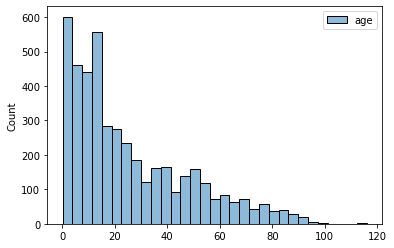

In [31]:
# sns.histplot(data = all_people, x = 'age', hue = 'gender', multiple = 'dodge', shrink = 0.8)
# sns.histplot(data = all_people,  hue = 'gender')


# Male histogram:
sns.histplot(mo_yr)

<AxesSubplot:ylabel='Count'>

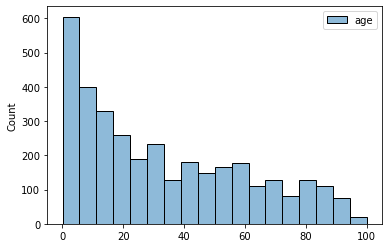

In [32]:
# Female histogram:
sns.histplot(mo_yr1)

#### M2

In [33]:
age_sex_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group() for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
age_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(1) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
ym_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(2) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]
sex_list = [re.search(r'(\d+)\s*(YO|YR|MO)\s*(M|F)', i).group(3) for i in df['description'] \
                if re.search(r'\d+\s*(YO|YR|MO)\s*(M|F)', i) != None]

In [34]:
#Generate female and male age list
female_age_list = []
male_age_list = []
for i in range(len(ym_list)):
    if sex_list[i] == 'F':
        if ym_list[i] == 'MO':
            female_age_list.append(int(age_list[i]) / 12)
        else:
            female_age_list.append(int(age_list[i]))
    elif sex_list[i] == 'M':
        if ym_list[i] == 'MO':
            male_age_list.append(int(age_list[i]) / 12)
        else:
            male_age_list.append(int(age_list[i]))

In [35]:
print('There are ' +str(len(female_age_list)) + ' female in the data.')
print('There are ' +str(len(male_age_list)) + ' male in the data.')


There are 3198 female in the data.
There are 4145 male in the data.


<AxesSubplot:xlabel='Sex'>

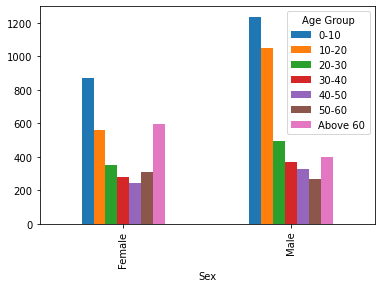

In [36]:
#Graphical representation of the number of injuries (y-axis) vs age / age group (x-axis) disaggregated by gender.
female_df = pd.DataFrame(female_age_list, columns = ['Age'])
female_df['Sex'] = 'Female'
f_age_group = []
#Add female age chunk to dataframe
for i in female_df['Age']:
    if i <= 10:
        f_age_group.append('0-10')
    elif i <= 20:
        f_age_group.append('10-20')
    elif i <= 30:
        f_age_group.append('20-30')
    elif i <= 40:
        f_age_group.append('30-40')
    elif i <= 50:
        f_age_group.append('40-50')
    elif i <= 60:
        f_age_group.append('50-60')
    else:
        f_age_group.append('Above 60')
female_df['Age Group'] = f_age_group

male_df = pd.DataFrame(male_age_list, columns = ['Age'])
male_df['Sex'] = 'Male'
m_age_group = []
#Add male age chunk to dataframe
for i in male_df['Age']:
    if i <= 10:
        m_age_group.append('0-10')
    elif i <= 20:
        m_age_group.append('10-20')
    elif i <= 30:
        m_age_group.append('20-30')
    elif i <= 40:
        m_age_group.append('30-40')
    elif i <= 50:
        m_age_group.append('40-50')
    elif i <= 60:
        m_age_group.append('50-60')
    else:
        m_age_group.append('Above 60')
male_df['Age Group'] = m_age_group
all_sex_df = pd.concat([female_df, male_df], ignore_index = True)
CrosstabResult=pd.crosstab(index=all_sex_df['Sex'],columns=all_sex_df['Age Group'])
CrosstabResult.plot.bar()